# Convolutional Neural Net

In this workbook we'll apply a CNN to the image data that was generated in the previous workbook.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import pickle
import time
import os
import json
import seaborn as sns
import tensorflow as tf
import random


from pandas import json_normalize
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score,classification_report
from sklearn.preprocessing import normalize,StandardScaler,RobustScaler,MinMaxScaler
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.compose import ColumnTransformer


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten, Conv2D, MaxPooling2D,LeakyReLU
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow import keras




import librosa
import librosa.display

from scipy.stats import skew

### Importing Variables

In [ ]:
with open('pickles/y.pkl', 'rb') as f:
    y = pickle.load(f)
    
with open('pickles/X.pkl', 'rb') as f:
    X = pickle.load(f)

### Random Sampling

In [ ]:
len(X),len(y)

### Train-test Split

In [ ]:
X = np.array(X).astype('float32') / 255.0
y = np.array(y)

In [5]:
X[0][0].shape[0]

224

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
X_train.shape

(29040, 224, 224, 3)

In [8]:
X_train = X_train.reshape(X_train.shape[0], 224, 224, 3)
X_val = X_val.reshape(X_val.shape[0], 224, 224, 3)

In [9]:
tf.config.list_physical_devices('mps')

[]

In [10]:
model = Sequential([
    Conv2D(32, (3, 3), strides=(2, 2), activation=LeakyReLU(alpha=0.1), input_shape=(X_train.shape[1:])),
    MaxPooling2D(2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(.2),
    Dense(2, activation='sigmoid')
])

Metal device set to: Apple M1 Max


2023-04-20 08:59:56.625908: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-04-20 08:59:56.626723: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [11]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [12]:
early_stopping = EarlyStopping(monitor='val_loss', patience=6)

In [13]:
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size = 32,
    epochs = 100,
    verbose= 1,
    callbacks=[early_stopping]
)

Epoch 1/100


2023-04-20 09:00:15.422936: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-04-20 09:00:15.802622: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


908/908 [==============================] - ETA: 0s - loss: 0.5907 - accuracy: 0.7325

2023-04-20 09:00:58.429300: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


908/908 [==============================] - 52s 56ms/step - loss: 0.5907 - accuracy: 0.7325 - val_loss: 0.5836 - val_accuracy: 0.7418
Epoch 2/100
908/908 [==============================] - 47s 52ms/step - loss: 0.5808 - accuracy: 0.7340 - val_loss: 0.5666 - val_accuracy: 0.7438
Epoch 3/100
908/908 [==============================] - 47s 52ms/step - loss: 0.5789 - accuracy: 0.7354 - val_loss: 0.5716 - val_accuracy: 0.7433
Epoch 4/100
908/908 [==============================] - 47s 52ms/step - loss: 0.5763 - accuracy: 0.7361 - val_loss: 0.5664 - val_accuracy: 0.7441
Epoch 5/100
908/908 [==============================] - 47s 52ms/step - loss: 0.5749 - accuracy: 0.7365 - val_loss: 0.5717 - val_accuracy: 0.7436
Epoch 6/100
908/908 [==============================] - 48s 53ms/step - loss: 0.5755 - accuracy: 0.7364 - val_loss: 0.5654 - val_accuracy: 0.7447
Epoch 7/100
908/908 [==============================] - 48s 53ms/step - loss: 0.5733 - accuracy: 0.7368 - val_loss: 0.5687 - val_accuracy: 0.74

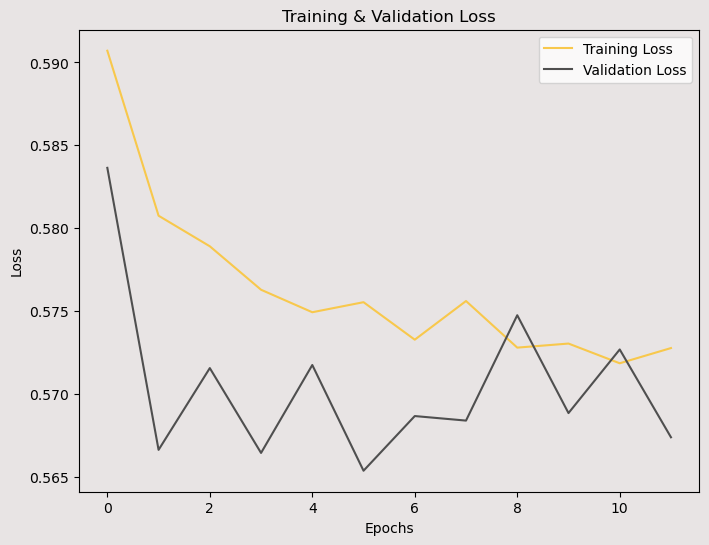

In [14]:
yellow = '#f8c84c'
grey = '#4F4F4F'
background = '#e8e4e4'

# Create the figure with the grey background
fig = plt.figure(figsize=(8, 6), facecolor=background)

# Set the background color of the plot area to grey
ax = fig.add_subplot(111)
ax.set_facecolor(background)

# Plot the data with the yellow-grey color scheme
plt.plot(history.epoch, history.history['loss'], color=yellow, label='Training Loss')
plt.plot(history.epoch, history.history['val_loss'], color=grey, label='Validation Loss')
plt.yscale('linear')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plot
plt.show()

In [ ]:
with open('pickles/model.pkl', 'wb') as f:
    pickle.dump(model, f)